In [1]:
# Monte Carlo Simulation to predict stock price using previous volatility

In [8]:
# Importing libraries
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [10]:
startdate = '2010-01-01'
today = datetime.today().strftime('%Y-%m-%d')

startdate, today

('2010-01-01', '2020-08-14')

In [11]:
# function to get stock Adjusted closing price price 
def getMyPortfolio(stocks = stock_symbols, start = startdate, end = today, col = 'Adj Close'):
    data = web.DataReader(stocks, data_source = 'yahoo' ,start = start, end = end)[col]
    return data

NameError: name 'stock_symbols' is not defined

In [12]:
price = web.DataReader('MS', data_source = 'yahoo', start = startdate, end = today)['Adj Close']

In [13]:
price

Date
2010-01-04    25.759523
2010-01-05    26.701244
2010-01-06    27.042919
2010-01-07    27.434603
2010-01-08    26.876251
                ...    
2020-08-10    50.580002
2020-08-11    51.779999
2020-08-12    52.380001
2020-08-13    52.180000
2020-08-14    52.285000
Name: Adj Close, Length: 2673, dtype: float64

In [14]:
# daily return and volatiltiy
daily_return = price.pct_change()
daily_vol = daily_return.std()

daily_return, daily_vol

(Date
 2010-01-04         NaN
 2010-01-05    0.036558
 2010-01-06    0.012796
 2010-01-07    0.014484
 2010-01-08   -0.020352
                 ...   
 2020-08-10    0.004568
 2020-08-11    0.023725
 2020-08-12    0.011588
 2020-08-13   -0.003818
 2020-08-14    0.002012
 Name: Adj Close, Length: 2673, dtype: float64,
 0.02268489359615008)

In [16]:
last_price = price[-1]
last_price

52.28499984741211

In [20]:
# Monte Carlo Simulation setup
num_simu = 5
num_days = 252

simulation_df = pd.DataFrame()

In [26]:
for x in range(num_simu):
    count = 0
    daily_vol = daily_return.std()
    
    price_series = []
    
    prices = last_price*(1 + np.random.normal(0, daily_vol))
    price_series.append(prices)
    
    for y in range(num_days):
        if count == 251:
            break
        prices = price_series[count]*(1+np.random.normal(0, daily_vol))
        price_series.append(prices)
        count += 1
    
    simulation_df[x] = price_series


simulation_df.head()

,0,1,2,3,4
0,52.829531,51.423870,52.210446,53.347312,50.665330
1,52.377687,52.707218,53.161308,53.743467,49.248691
2,54.042465,53.820642,53.739865,52.960404,47.549982
3,53.562202,51.418418,53.419265,53.332269,46.318725
4,54.079874,50.582454,53.977605,53.669979,46.864065


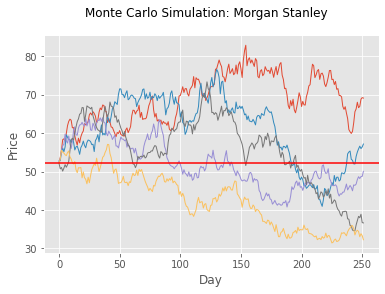

In [24]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: Morgan Stanley')
plt.plot(simulation_df, lw = 1)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
# Improved Simulations
